In [3]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

from wavespectra import read_swan

def print_header(string, string2='', nchar=80):
    print('\n{}\n{}:\n{}\n{}'.format(nchar*'=', string, nchar*'=', string2))


# Read spectra from file

In [4]:
ds = read_swan('../tests/sample_files/swanfile.spec')
print_header('Reading SWAN ASCII file', ds.spec)


Reading SWAN ASCII file:
<SpecDataset>
Dimensions:  (dir: 36, freq: 24, lat: 1, lon: 1, time: 5)
Coordinates:
  * lat      (lat) float64 -38.17
  * lon      (lon) float64 174.7
  * time     (time) datetime64[ns] 2016-10-11 2016-10-12 2016-10-13 ...
  * freq     (freq) float64 0.04 0.0452 0.0511 0.0577 0.0652 0.0737 0.0833 ...
  * dir      (dir) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.0 95.0 ...
Data variables:
    efth     (time, lat, lon, freq, dir) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    wspd     (time, lat, lon) float64 5.311 8.754 4.203 8.084 12.98
    wdir     (time, lat, lon) float64 9.021 348.2 267.1 291.4 227.2
    dpt      (time, lat, lon) float64 24.42 24.42 24.42 24.42 24.42


# Calculate spectral wave statistics

In [5]:
hs = ds.spec.hs()
stats = ds.spec.stats(['hs','tp','dpm'])

print_header('Calculate significant wave height', hs)
print_header('Calculate Multiple wave stats', stats)



Calculate significant wave height:
<xarray.DataArray 'hs' (time: 5, lat: 1, lon: 1)>
array([[[ 1.718762]],

       [[ 2.765395]],

       [[ 2.925697]],

       [[ 2.677657]],

       [[ 4.263132]]])
Coordinates:
  * lat      (lat) float64 -38.17
  * lon      (lon) float64 174.7
  * time     (time) datetime64[ns] 2016-10-11 2016-10-12 2016-10-13 ...
    freq     float64 0.6666
Attributes:
    standard_name:  sea_surface_wave_significant_height
    units:          m

Calculate Multiple wave stats:
<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 5)
Coordinates:
  * lat      (lat) float64 -38.17
  * lon      (lon) float64 174.7
  * time     (time) datetime64[ns] 2016-10-11 2016-10-12 2016-10-13 ...
    freq     float64 0.6666
Data variables:
    hs       (time, lat, lon) float64 1.719 2.765 2.926 2.678 4.263
    dpm      (time, lat, lon) float64 249.1 252.3 251.6 249.9 251.6
    tp       (time, lat, lon) float64 12.91 14.51 15.11 13.18 12.98


# Partitioning based on frequency split


Full spectrum:
<xarray.DataArray 'freq' (freq: 24)>
array([ 0.04  ,  0.0452,  0.0511,  0.0577,  0.0652,  0.0737,  0.0833,  0.0942,
        0.1064,  0.1203,  0.1359,  0.1536,  0.1736,  0.1962,  0.2217,  0.2505,
        0.2831,  0.32  ,  0.3616,  0.4087,  0.4618,  0.5219,  0.5899,  0.6666])
Coordinates:
  * freq     (freq) float64 0.04 0.0452 0.0511 0.0577 0.0652 0.0737 0.0833 ...
Attributes:
    standard_name:  sea_surface_wave_frequency
    units:          Hz

High-frequency partition:
<xarray.DataArray 'freq' (freq: 15)>
array([ 0.125 ,  0.1359,  0.1536,  0.1736,  0.1962,  0.2217,  0.2505,  0.2831,
        0.32  ,  0.3616,  0.4087,  0.4618,  0.5219,  0.5899,  0.6666])
Coordinates:
  * freq     (freq) float64 0.125 0.1359 0.1536 0.1736 0.1962 0.2217 0.2505 ...
Attributes:
    standard_name:  sea_surface_wave_frequency
    units:          Hz

Low-frequency partition:
<xarray.DataArray 'freq' (freq: 11)>
array([ 0.04  ,  0.0452,  0.0511,  0.0577,  0.0652,  0.0737,  0.0833,  0.0942,
    

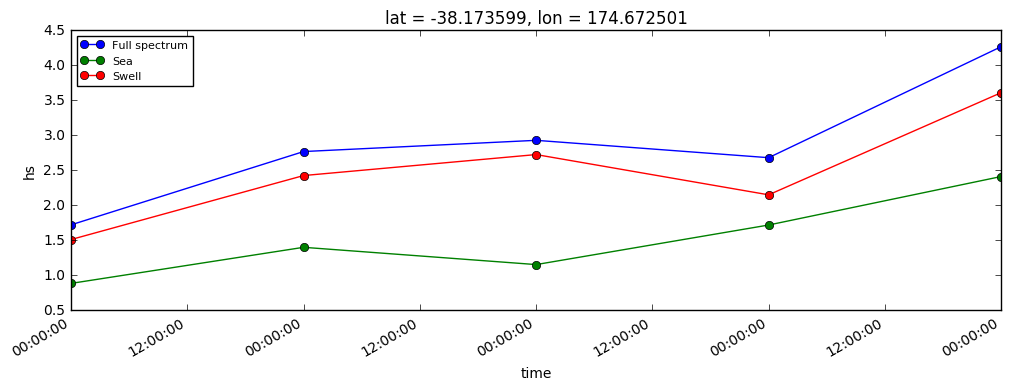

In [19]:
fcut = 1./8
ds_sea = ds.spec.split(fmin=fcut)
ds_swell = ds.spec.split(fmax=fcut)

print_header('Full spectrum', ds.freq)
print_header('High-frequency partition', ds_sea.freq)
print_header('Low-frequency partition', ds_swell.freq)

print_header('Plotting')
plt.figure(figsize=[12,4])
hs.isel(lat=0, lon=0).plot(label='Full spectrum', marker='o')
ds_sea.spec.hs().isel(lat=0, lon=0).plot(label='Sea', marker='o')
ds_swell.spec.hs().isel(lat=0, lon=0).plot(label='Swell', marker='o')
plt.legend(loc=0, fontsize=8)

# Watershed partitioning

An extra dimension [part] is defined:
<xarray.DataArray 'efth' (part: 3, time: 5, lat: 1, lon: 1, freq: 24, dir: 36)>
array([[[[[[  0.000000e+00, ...,   0.000000e+00],
           ..., 
           [  5.056988e-05, ...,   5.056988e-05]]]],



        ..., 
        [[[[  0.000000e+00, ...,   0.000000e+00],
           ..., 
           [  0.000000e+00, ...,   0.000000e+00]]]]],




       ..., 
       [[[[[  0.000000e+00, ...,   0.000000e+00],
           ..., 
           [  0.000000e+00, ...,   0.000000e+00]]]],



        ..., 
        [[[[  0.000000e+00, ...,   0.000000e+00],
           ..., 
           [  0.000000e+00, ...,   0.000000e+00]]]]]])
Coordinates:
  * part     (part) int64 0 1 2
  * lat      (lat) float64 -38.17
  * lon      (lon) float64 174.7
  * time     (time) datetime64[ns] 2016-10-11 2016-10-12 2016-10-13 ...
  * freq     (freq) float64 0.04 0.0452 0.0511 0.0577 0.0652 0.0737 0.0833 ...
  * dir      (dir) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 75.0 85.0 95.0 ...
Plott

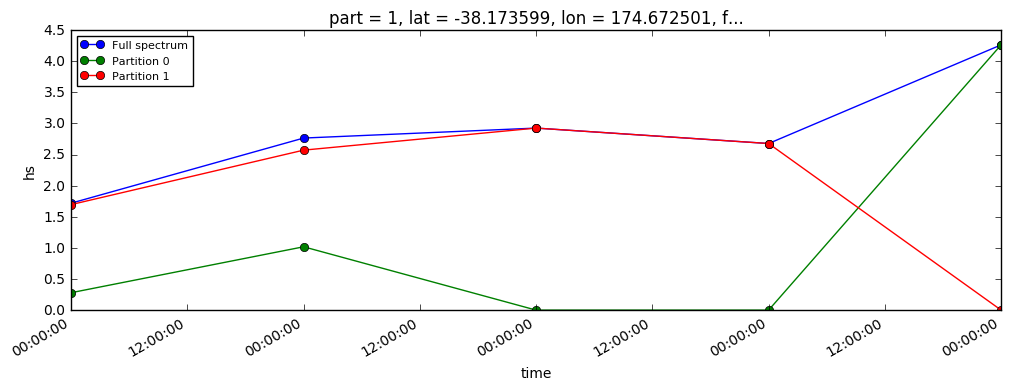

In [13]:
ds_part = ds.spec.partition(ds.wspd, ds.wdir, ds.dpt)
hs_part = ds_part.spec.hs()

print_header('An extra dimension [part] is defined', ds_part)

print_header('Plotting')
plt.figure(figsize=[12,4])
hs.isel(lat=0, lon=0).plot(label='Full spectrum', marker='o')
hs_part.isel(part=0, lat=0, lon=0).plot(label='Partition 0', marker='o')
hs_part.isel(part=1, lat=0, lon=0).plot(label='Partition 1', marker='o')
plt.legend(loc=0, fontsize=8)

# Integrate over directions and plot


Plotting spectra history:



(0.04, 0.2)

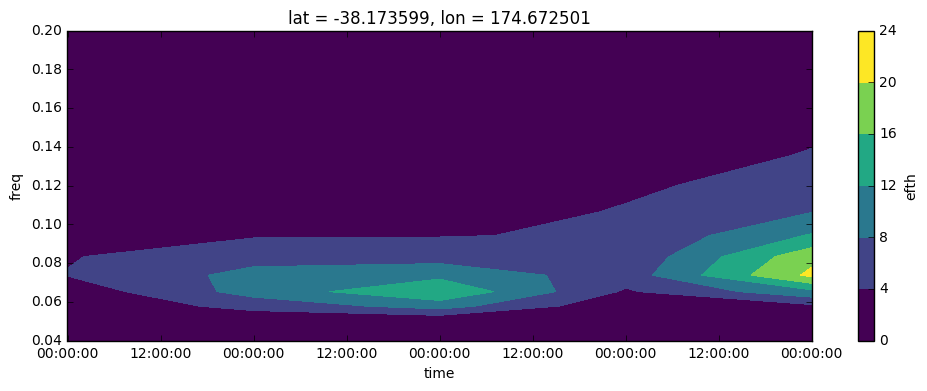

In [32]:
dsf = ds.spec.oned()

print_header('Plotting spectra history')
plt.figure(figsize=[12,4])
dsf.transpose().isel(lat=0, lon=0).plot.contourf()
plt.ylim((0.04, 0.2))